In [95]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
import python_speech_features

In [96]:
def audio_plot(audio_file):
    audio, Fs = lr.load(audio_file) #Fs is the sampling rate

    #print(audio.size/Fs) #gives the time duration of the audio signal
    #print(Fs)

    Ts = 1.0/Fs #Time step of a single sample
    t = np.arange(0, len(audio)/Fs, Ts) #time vector

    N = len(audio) #total number of samples
    #k = np.arange(N)
    #T = N/Fs #time duration of the audio signal
    #f = k/T #since I need total 'k' samples in the time duration of the audio
    f = np.fft.fftfreq(N, d=Ts)

    fft_audio = np.fft.fft(audio)/N

    fig, ax = plt.subplots(2, 1, figsize=(12, 4))
    ax[0].plot(t, audio)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].plot(f/1000, abs(fft_audio)) 
    ax[1].set_xlabel('Freq (KHz)')
    ax[1].set_ylabel('|Y(freq)|')

In [97]:
n_class = 9
n_aud_files = 67

files = np.empty([9, 67], dtype=object)

data_folder = glob.glob("../Read_Up/*")
#print(data_folder)

for (i, session) in zip(range(n_class), data_folder):
    for (j, aud_file) in zip(range(n_aud_files), glob.glob("%s/*"%session)):
        files[i][j] = aud_file
                           

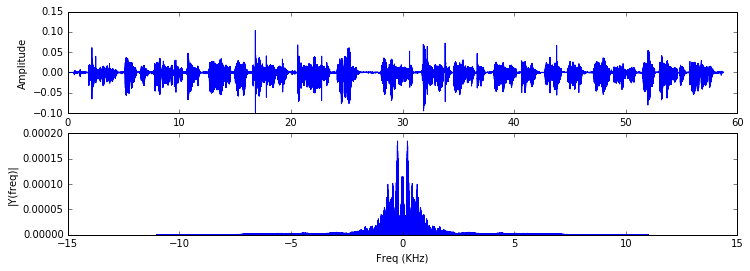

In [98]:
audio_plot('../Read_Up/IDR1/01.wav')